In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [2]:
data = pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.shape

(50, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [9]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [12]:
data2 = data.drop(['Unnamed: 0'],axis = 1)
data2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [16]:
#rounding up our rate of murders 
import math
data2['Murder'] = data2['Murder'].apply(math.ceil).astype(int)

In [18]:
#rounding up our rate of  rape 
data2['Rape'] = data2['Rape'].apply(math.ceil).astype(int)

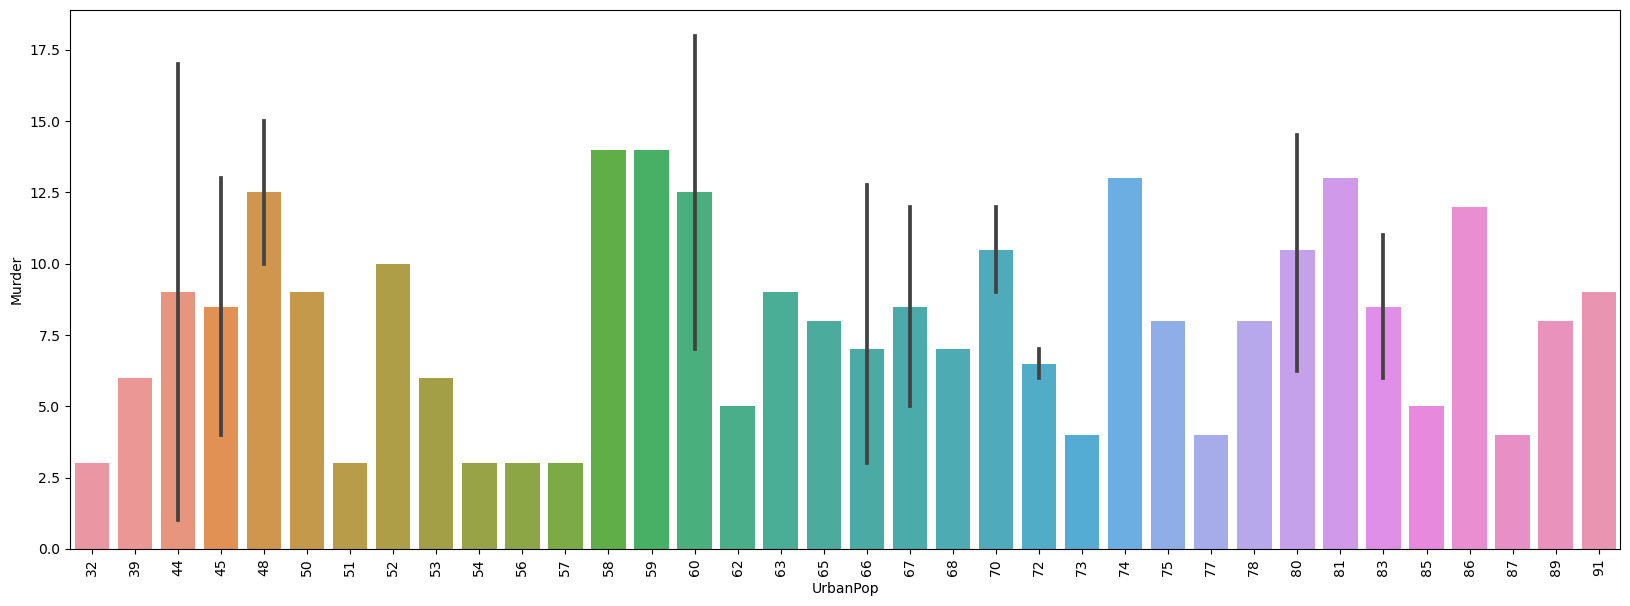

In [19]:
plt.figure(figsize=(20,7))
UrbanPop = data2[['Murder','UrbanPop']].sort_values('UrbanPop',ascending=False)
ax = sns.barplot(x = 'UrbanPop',y = 'Murder',data = UrbanPop)
ax.set(xlabel = 'UrbanPop',ylabel = 'Murder')
plt.xticks(rotation = 90)
plt.show()

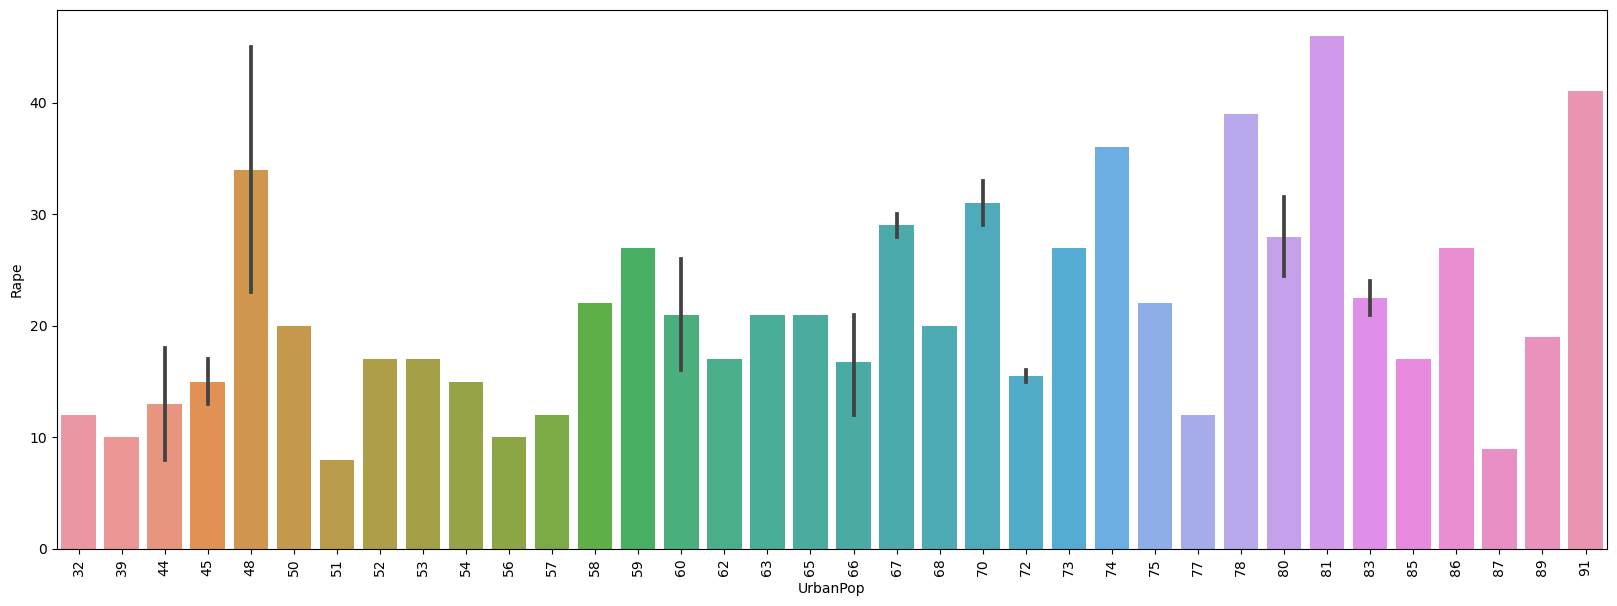

In [20]:
#plotting the rate of rape in urban population
plt.figure(figsize=(20,7))
UrbanPop = data2[['Rape','UrbanPop']].sort_values('UrbanPop',ascending=False)
ax = sns.barplot(x = 'UrbanPop',y = 'Rape',data = UrbanPop)
ax.set(xlabel = 'UrbanPop',ylabel = 'Rape')
plt.xticks(rotation = 90)
plt.show()

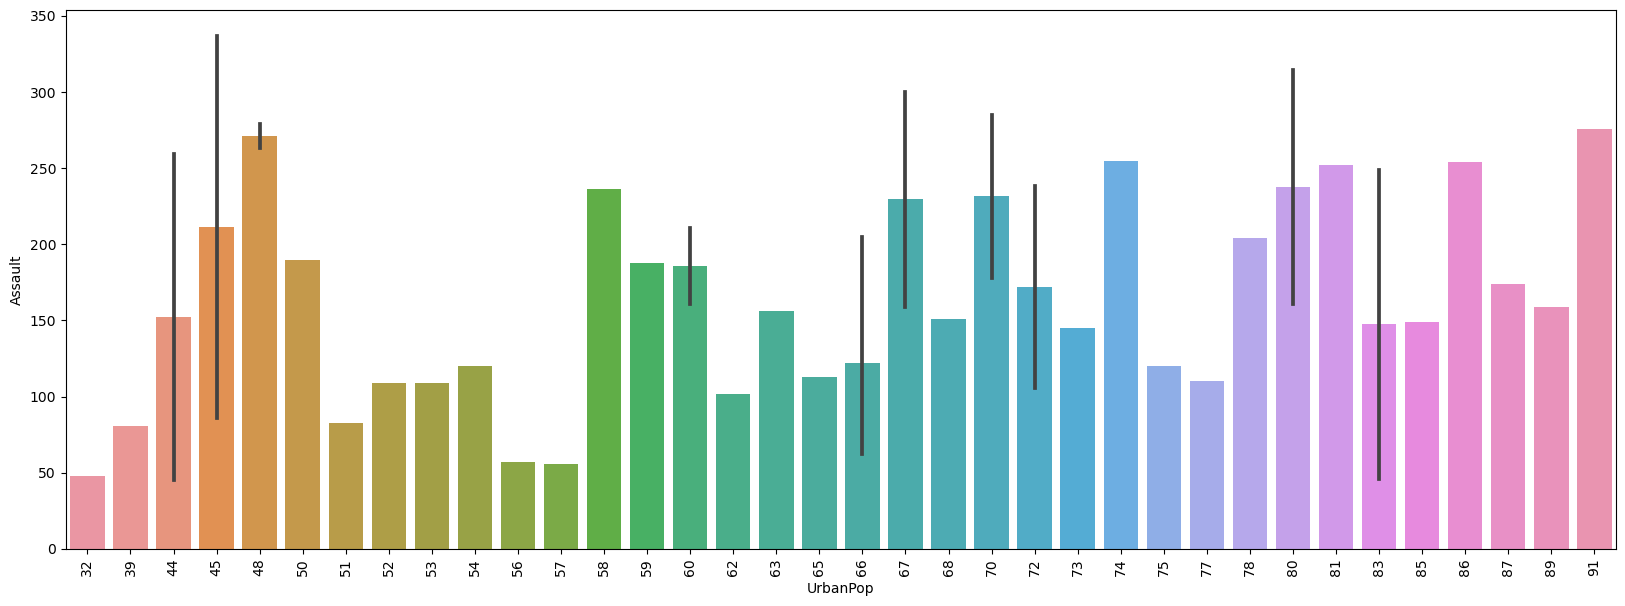

In [21]:
#plotting the rate of Assault in urban population
plt.figure(figsize=(20,7))
UrbanPop = data2[['Assault','UrbanPop']].sort_values('UrbanPop',ascending=False)
ax = sns.barplot(x = 'UrbanPop',y = 'Assault',data = UrbanPop)
ax.set(xlabel = 'UrbanPop',ylabel = 'Assault')
plt.xticks(rotation = 90)
plt.show()


Murder


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


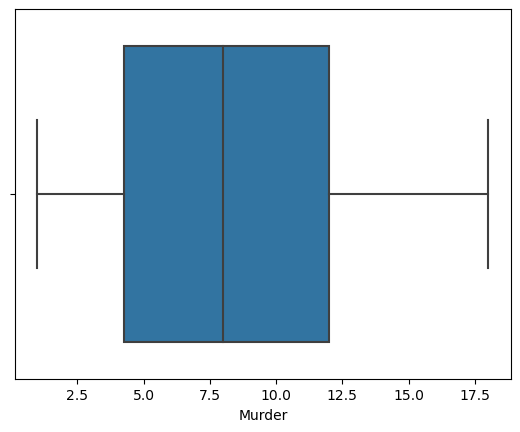

Assault


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


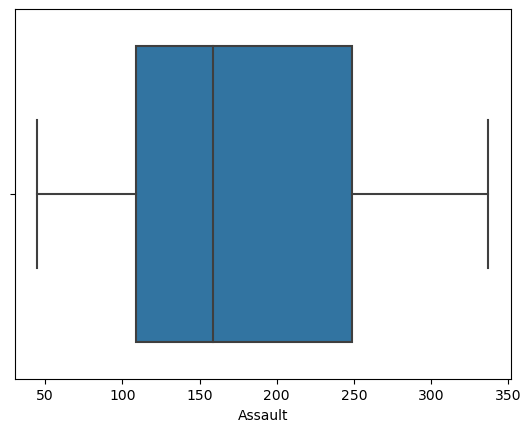

UrbanPop


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


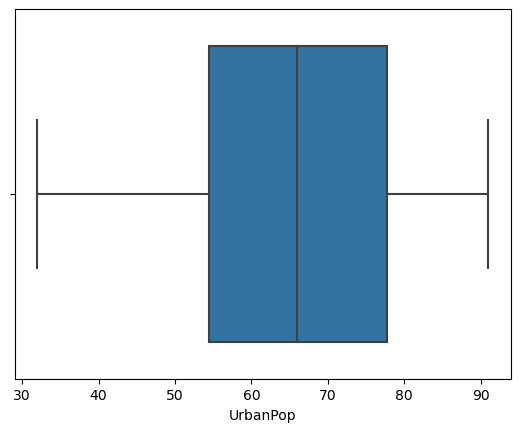

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Rape


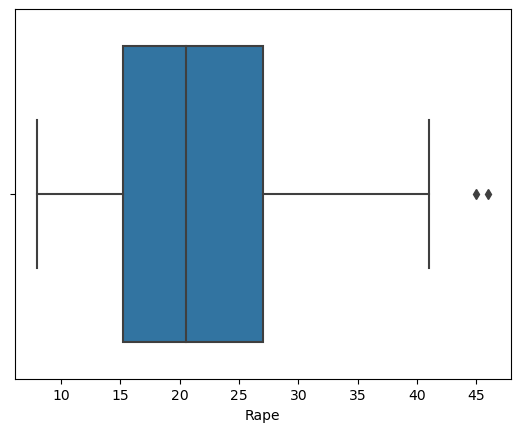

In [23]:
#checking for any outliers 
for n in data2 .columns:
    print(n)
    sns.boxplot(data2[n])
    plt.show()

<AxesSubplot:>

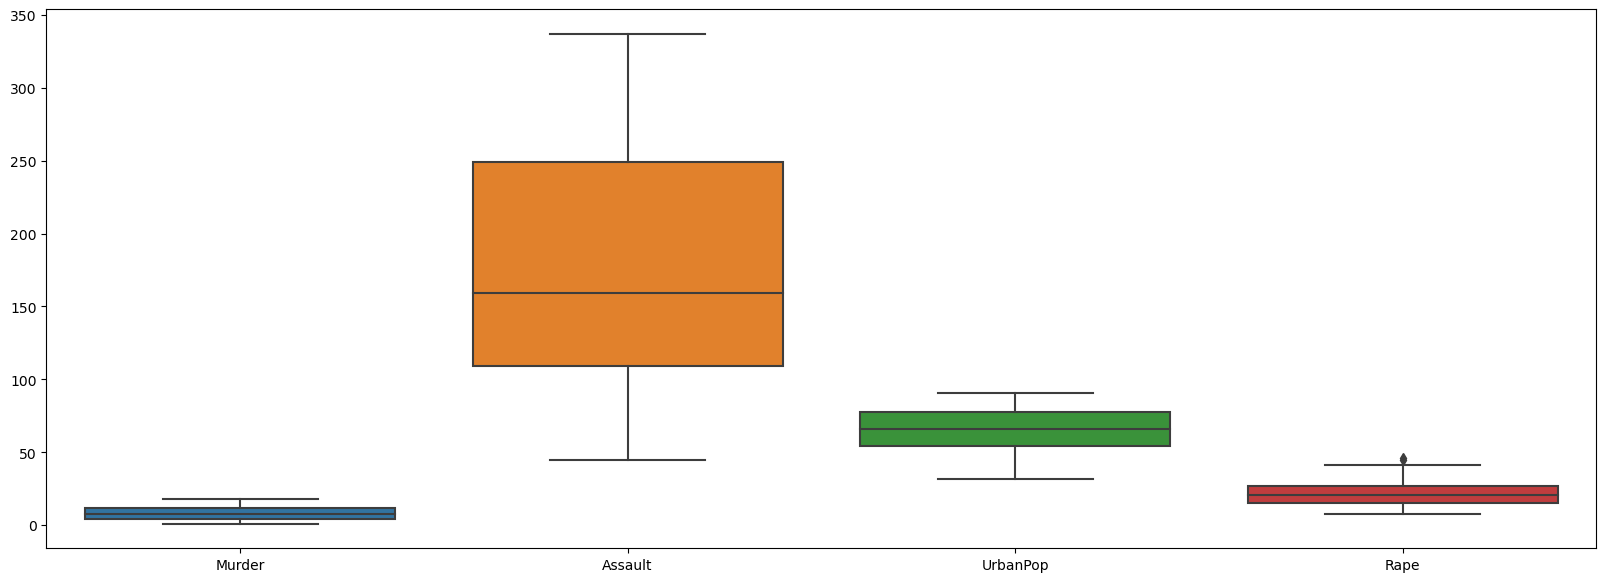

In [25]:
plt.figure(figsize=(20,7))
sns.boxplot(data = data2)

In [38]:
#treating outliers 
q1 = data2['Rape'].quantile(0.25)
q3 = data2['Rape'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 - (1.5* iqr)
df3 = data2[(data2['Rape']>lq1)&(data2['Rape']<uq1)]

<AxesSubplot:>

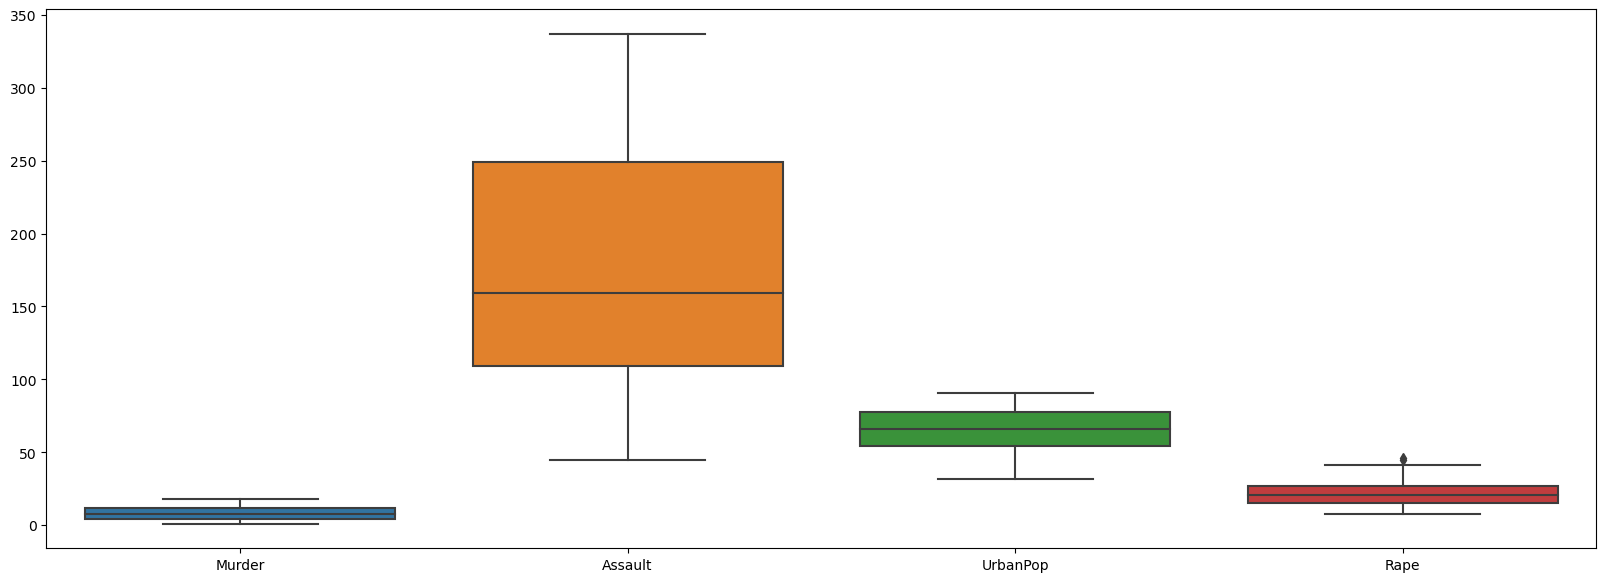

In [39]:
#checking with outliers 
plt.figure(figsize=(20,7))
sns.boxplot(data = data2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rape'>

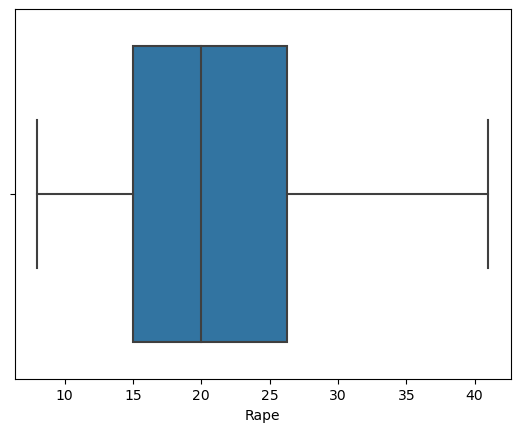

In [40]:
#outliers have been treated and eliminated
sns.boxplot(df3['Rape'])

# Kmeans

In [46]:
#scaling our data into standard values 
Standard_Scaler = StandardScaler()
scaled = Standard_Scaler.fit_transform(df3)

Text(0, 0.5, 'wcss')

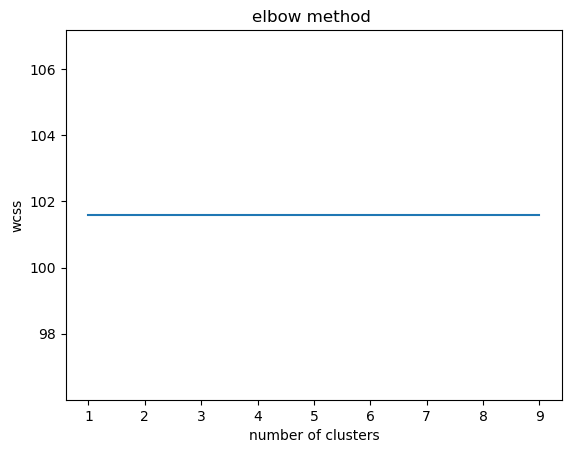

In [52]:
#elbow method for determining K value 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = 2,random_state = 0)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('elbow method ')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
    

In [54]:
#since we see the score k= 4 is okay for generalised model 
clusters_new = KMeans(3,random_state=0)
clusters_new.fit(scaled)

KMeans(n_clusters=3, random_state=0)

In [55]:
clusters_new.labels_

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2,
       1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0,
       0, 2, 2, 0])

In [56]:
#assigning our new cluster labels to table
df3['clusterid_new'] = clusters_new.labels_

C:\Users\prabi\AppData\Local\Temp\ipykernel_12580\798538663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clusterid_new'] = clusters_new.labels_


In [57]:
df3.head()

,Murder,Assault,UrbanPop,Rape,clusterid_new
0,14,236,58,22,1
2,9,294,80,31,1
3,9,190,50,20,0
4,9,276,91,41,1
5,8,204,78,39,1


In [58]:
#calculating the centroids 
clusters_new.cluster_centers_

array([[-0.42204993, -0.30722339,  0.48399524, -0.18395284],
       [ 1.06839245,  1.06837436,  0.22839064,  0.89670633],
       [-0.92740117, -1.07753391, -0.94915004, -1.00103967]])

In [59]:
#calculate aggregate mean by grouping 
df3.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.294118,141.882353,72.470588,19.235294
1,1,12.833333,255.000000,68.833333,27.888889
2,2,4.076923,78.538462,52.076923,12.692308


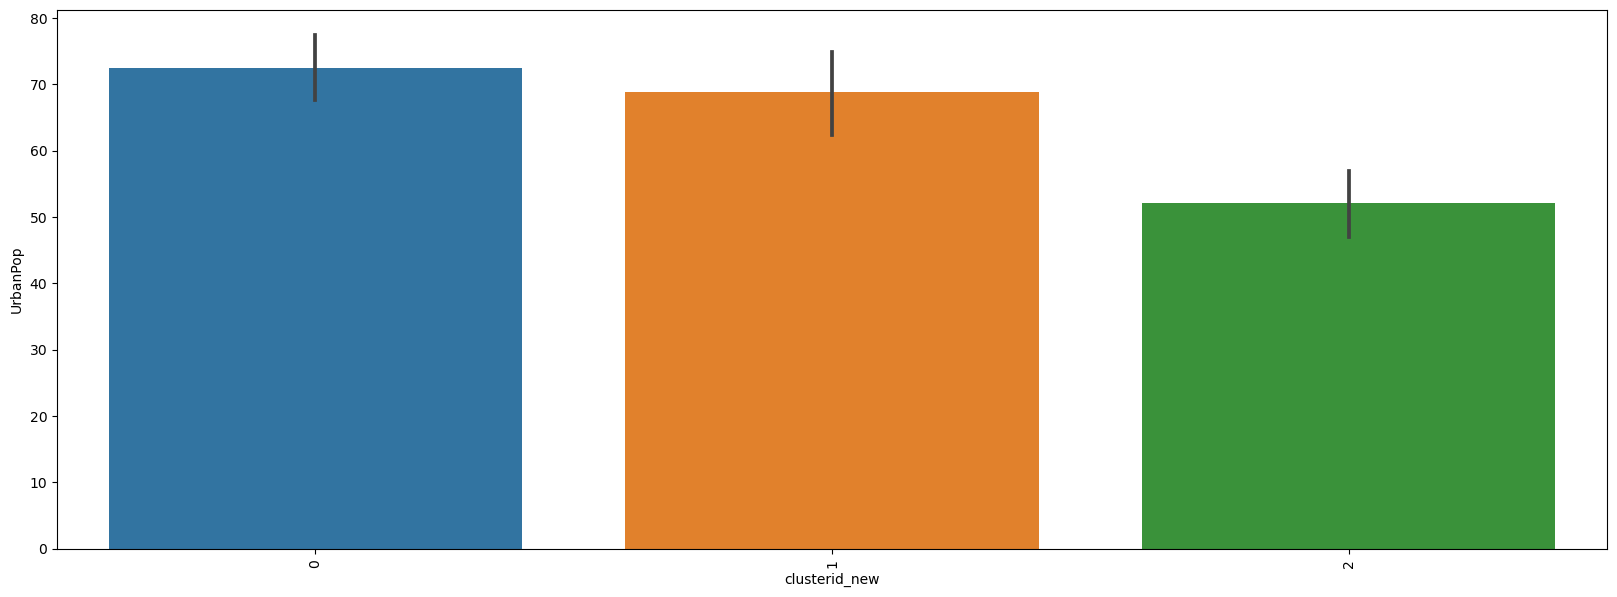

In [61]:
#plotting the rate of  cluters in urban population
plt.figure(figsize=(20,7))
UrbanPop = df3[['clusterid_new','UrbanPop']].sort_values('UrbanPop',ascending=False)
ax = sns.barplot(x = 'clusterid_new',y = 'UrbanPop',data = UrbanPop)
ax.set(xlabel = 'clusterid_new',ylabel = 'UrbanPop')
plt.xticks(rotation = 90)
plt.show()

In [62]:
#least crime in urban pop 
df3[df3['clusterid_new']==2]

,Murder,Assault,UrbanPop,Rape,clusterid_new
11,3,120,54,15,2
14,3,56,57,12,2
16,10,109,52,17,2
18,3,83,51,8,2
22,3,72,66,15,2
25,6,109,53,17,2
26,5,102,62,17,2
28,3,57,56,10,2
33,1,45,44,8,2
40,4,86,45,13,2


In [63]:
#highest crime in urban pop 
df3[df3['clusterid_new']==0]

,Murder,Assault,UrbanPop,Rape,clusterid_new
3,9,190,50,20,0
6,4,110,77,12,0
7,6,238,72,16,0
10,6,46,83,21,0
13,8,113,65,21,0
15,6,115,66,18,0
20,5,149,85,17,0
29,8,159,89,19,0
34,8,120,75,22,0
35,7,151,68,20,0


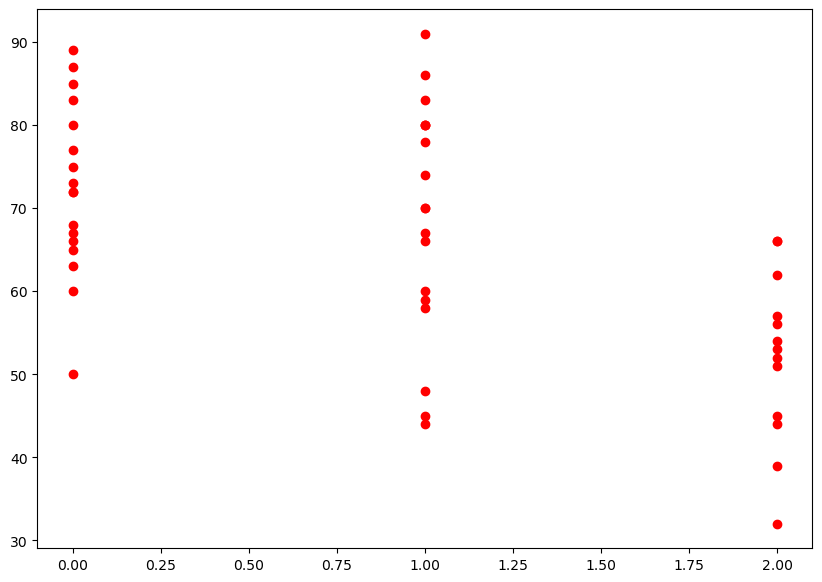

In [64]:
#plotting clusters 
plt.figure(figsize=(10,7))
plt.scatter(df3['clusterid_new'],df3['UrbanPop'],c = 'red')

In [67]:
from sklearn.metrics import silhouette_score
print("clustering score:",(silhouette_score(scaled,clusters_new.labels_)*100).round(3))

clustering score: 31.502


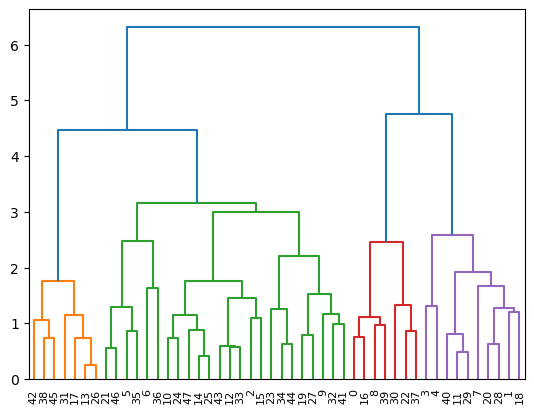

In [71]:
#Hierarchial clustering
#plotting dendrogram for dataset
from scipy.cluster import hierarchy as sch
dng = sch.dendrogram(sch.linkage(scaled,method = 'complete'))


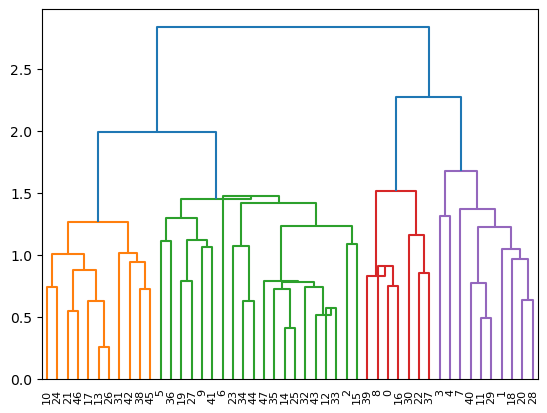

In [73]:
#plotting dendrogram for dataset
dng = sch.dendrogram(sch.linkage(scaled,method = 'centroid'))

In [75]:
#creating cluster by giving parameters 
hc = AgglomerativeClustering(n_clusters=3,affinity ='euclidean',linkage = 'complete')

In [76]:
#fitting our clustering model 
hc.fit(scaled)


AgglomerativeClustering(linkage='complete', n_clusters=3)

In [78]:
#predicting values for y_hc
y_hc = hc.fit_predict(scaled)
y_hc

array([2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [79]:
#adding our new clusters to the dataset 
df3['h_clusterid'] = y_hc
df3.head()

C:\Users\prabi\AppData\Local\Temp\ipykernel_12580\4143301788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['h_clusterid'] = y_hc


,Murder,Assault,UrbanPop,Rape,clusterid_new,h_clusterid
0,14,236,58,22,1,2
2,9,294,80,31,1,1
3,9,190,50,20,0,0
4,9,276,91,41,1,1
5,8,204,78,39,1,1


In [80]:
df4 = df3.sort_values("h_clusterid")
df4.head()

,Murder,Assault,UrbanPop,Rape,clusterid_new,h_clusterid
24,9,178,70,29,1,0
25,6,109,53,17,2,0
26,5,102,62,17,2,0
28,3,57,56,10,2,0
29,8,159,89,19,0,0


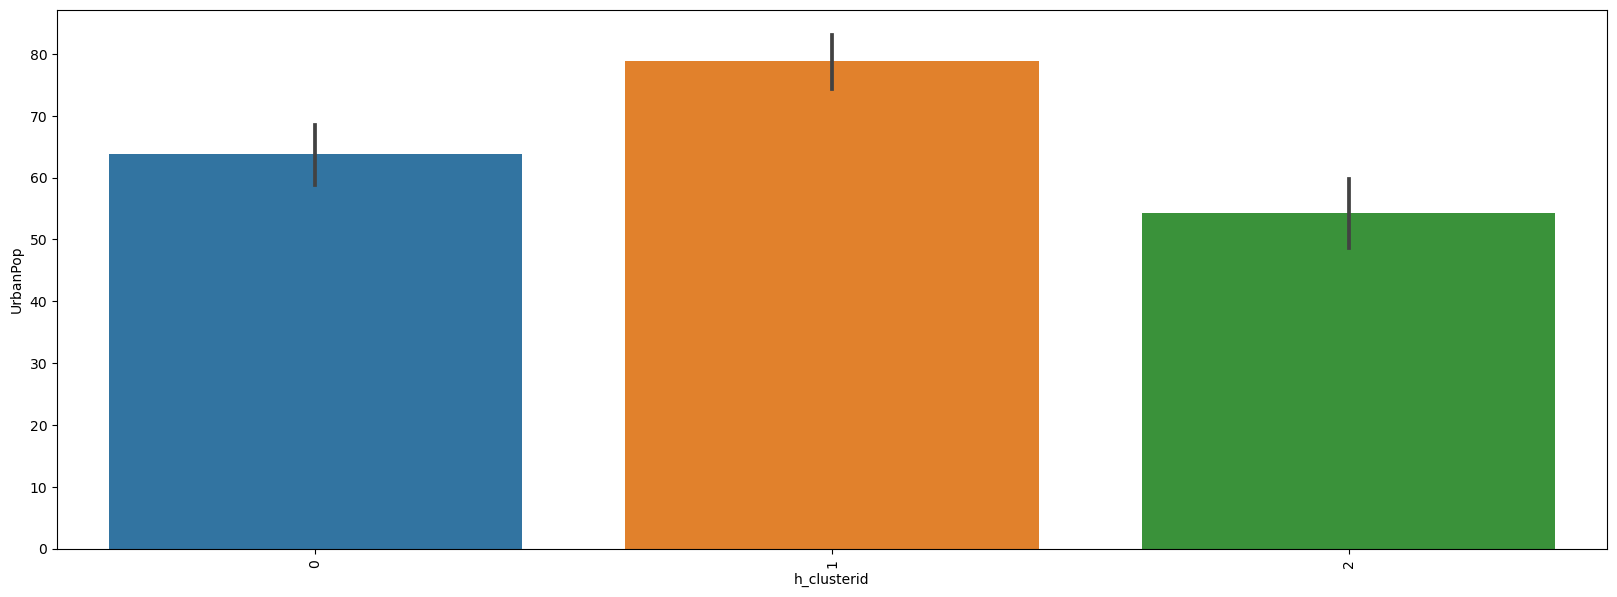

In [82]:
#plotting the rate of  clusters in urban population
plt.figure(figsize=(20,7))
UrbanPop = df3[['h_clusterid','UrbanPop']].sort_values('UrbanPop',ascending=False)
ax = sns.barplot(x = 'h_clusterid',y = 'UrbanPop',data = UrbanPop)
ax.set(xlabel = 'h_clusterid',ylabel = 'UrbanPop')
plt.xticks(rotation = 90)
plt.show()

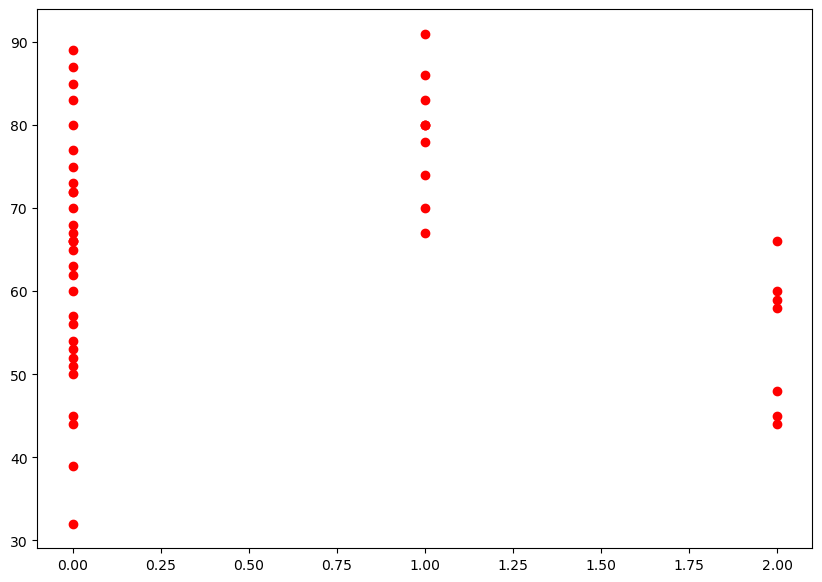

In [83]:
#plotting clusters 
plt.figure(figsize=(10,7))
plt.scatter(df3['h_clusterid'],df3['UrbanPop'],c = 'red')

In [84]:
#calculate aggregate mean by grouping 
df3.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape,clusterid_new
,,mean,mean,mean,mean,mean
0,0,5.451613,116.483871,63.838710,16.806452,0.870968
1,1,11.500000,265.300000,78.900000,31.700000,1.000000
2,2,15.285714,251.285714,54.285714,22.285714,1.000000


In [87]:
print("cluster labels for each point:",hc.labels_)
print("no of leaves in hierarchial tree:",hc.n_leaves_)
print("the estimated no of connected components in the graph:",hc.n_connected_components_)
print("the children on each non-leaf node:",hc.children_)
print("clustering score:",(silhouette_score(scaled,hc.labels_)*100).round(3))

cluster labels for each point: [2 1 0 1 1 0 0 1 2 0 0 1 0 0 0 0 2 0 1 0 1 0 2 0 0 0 0 0 1 1 2 0 0 0 0 0 0
 2 0 2 1 0 0 0 0 0 0 0]
no of leaves in hierarchial tree: 48
the estimated no of connected components in the graph: 1
the children on each non-leaf node: [[13 26]
 [14 25]
 [11 29]
 [21 46]
 [12 33]
 [43 52]
 [34 44]
 [20 28]
 [38 45]
 [17 48]
 [10 24]
 [ 0 16]
 [19 27]
 [40 50]
 [ 5 35]
 [22 37]
 [47 49]
 [ 8 39]
 [32 41]
 [42 56]
 [ 2 15]
 [59 65]
 [31 57]
 [58 64]
 [ 9 66]
 [ 1 18]
 [23 54]
 [55 73]
 [51 62]
 [ 3  4]
 [30 63]
 [53 68]
 [60 72]
 [ 6 36]
 [ 7 75]
 [71 79]
 [67 70]
 [61 82]
 [74 80]
 [69 78]
 [76 81]
 [77 85]
 [83 86]
 [88 90]
 [84 91]
 [87 89]
 [92 93]]
clustering score: 37.423


In [88]:
#DBSCAN
df5 = df4.drop(['h_clusterid','clusterid_new'],axis = 1)
df5.head()

,Murder,Assault,UrbanPop,Rape
24,9,178,70,29
25,6,109,53,17
26,5,102,62,17
28,3,57,56,10
29,8,159,89,19


In [89]:
array = df5.values
array

array([[  9, 178,  70,  29],
       [  6, 109,  53,  17],
       [  5, 102,  62,  17],
       [  3,  57,  56,  10],
       [  8, 159,  89,  19],
       [  1,  45,  44,   8],
       [  8, 120,  75,  22],
       [  7, 151,  68,  20],
       [  3,  53,  66,  11],
       [  5, 159,  67,  30],
       [  4, 174,  87,   9],
       [  4,  86,  45,  13],
       [  4, 120,  80,  23],
       [  3,  48,  32,  12],
       [  9, 156,  63,  21],
       [  4, 145,  73,  27],
       [  6,  81,  39,  10],
       [  7, 106,  72,  15],
       [  3,  72,  66,  15],
       [  7, 161,  60,  16],
       [  3, 120,  54,  15],
       [  9, 190,  50,  20],
       [  3,  83,  51,   8],
       [ 10, 109,  52,  17],
       [  6, 115,  66,  18],
       [  3,  56,  57,  12],
       [  4, 110,  77,  12],
       [  8, 113,  65,  21],
       [  6, 238,  72,  16],
       [  5, 149,  85,  17],
       [  6,  46,  83,  21],
       [  9, 294,  80,  31],
       [  9, 276,  91,  41],
       [  8, 204,  78,  39],
       [ 13, 2

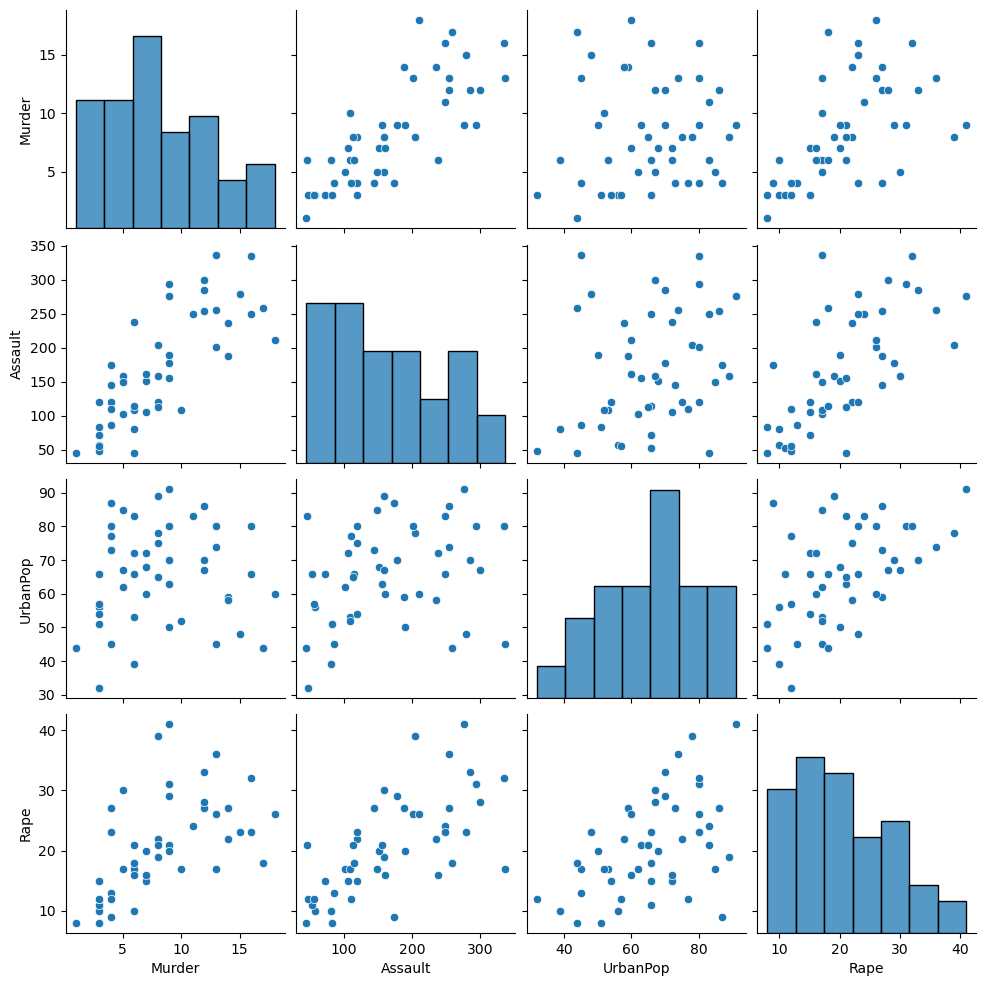

In [90]:
sns.pairplot(df5)

In [91]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)
X

array([[ 0.19468485,  0.13199503,  0.31037702,  1.03546166],
       [-0.48908632, -0.70709814, -0.88428169, -0.46309592],
       [-0.71701004, -0.79222353, -0.25181532, -0.46309592],
       [-1.17285749, -1.3394582 , -0.67345957, -1.33725451],
       [-0.03323888, -0.09905961,  1.64558381, -0.21333632],
       [-1.62870493, -1.48538745, -1.51674807, -1.58701411],
       [-0.03323888, -0.57332966,  0.66174723,  0.16130307],
       [-0.2611626 , -0.19634577,  0.16982893, -0.08845652],
       [-1.17285749, -1.38810128,  0.02928085, -1.21237471],
       [-0.71701004, -0.09905961,  0.09955489,  1.16034146],
       [-0.94493377,  0.08335195,  1.50503573, -1.46213431],
       [-0.94493377, -0.98679586, -1.44647403, -0.96261512],
       [-0.94493377, -0.57332966,  1.01311744,  0.28618287],
       [-1.17285749, -1.44890514, -2.36003657, -1.08749491],
       [ 0.19468485, -0.13554192, -0.18154127,  0.03642327],
       [-0.94493377, -0.2693104 ,  0.52119914,  0.78570207],
       [-0.48908632, -1.

In [93]:
#locating right epilson
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors= 4).fit(X)
distances,indices =nn.kneighbors(X)

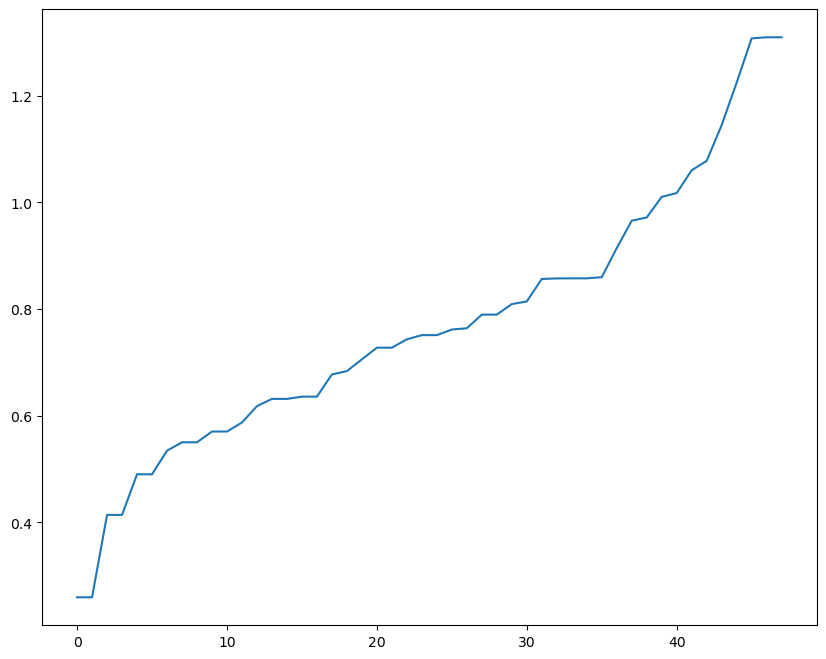

In [94]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [95]:
#we choose 1 as our epilson as distance is less for min samples 5
dbscan = DBSCAN(eps = 1, min_samples=4)
dbscan.fit_predict(X)

array([-1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1],
      dtype=int64)

In [96]:
#noisy samples are given by -1 
dbscan.labels_

array([-1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1],
      dtype=int64)

In [97]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,-1


In [98]:
#adding our new clusters to the dataset 
df5['cl'] = cl
df5.head()

,Murder,Assault,UrbanPop,Rape,cl
24,9,178,70,29,0.0
25,6,109,53,17,0.0
26,5,102,62,17,0.0
28,3,57,56,10,-1.0
29,8,159,89,19,0.0


In [99]:
#calculate aggregate mean by grouping 
df5.groupby('cl').agg(['mean']).reset_index()

,cl,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1.0,8.350000,166.750000,65.950000,21.200000
1,0.0,8.090909,179.818182,67.863636,21.272727
2,1.0,9.000000,129.500000,52.500000,18.750000


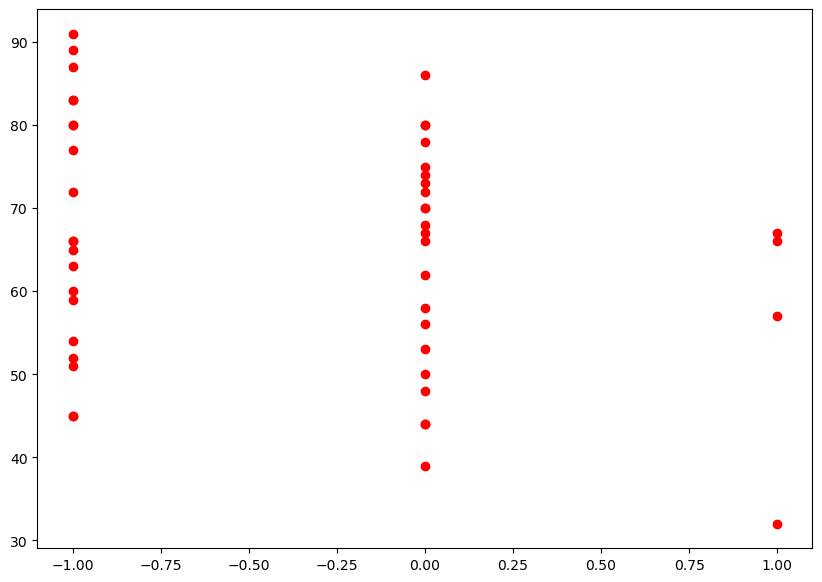

In [100]:
#plotting clusters 
plt.figure(figsize=(10,7))
plt.scatter(df5['cl'],df3['UrbanPop'],c = 'red')

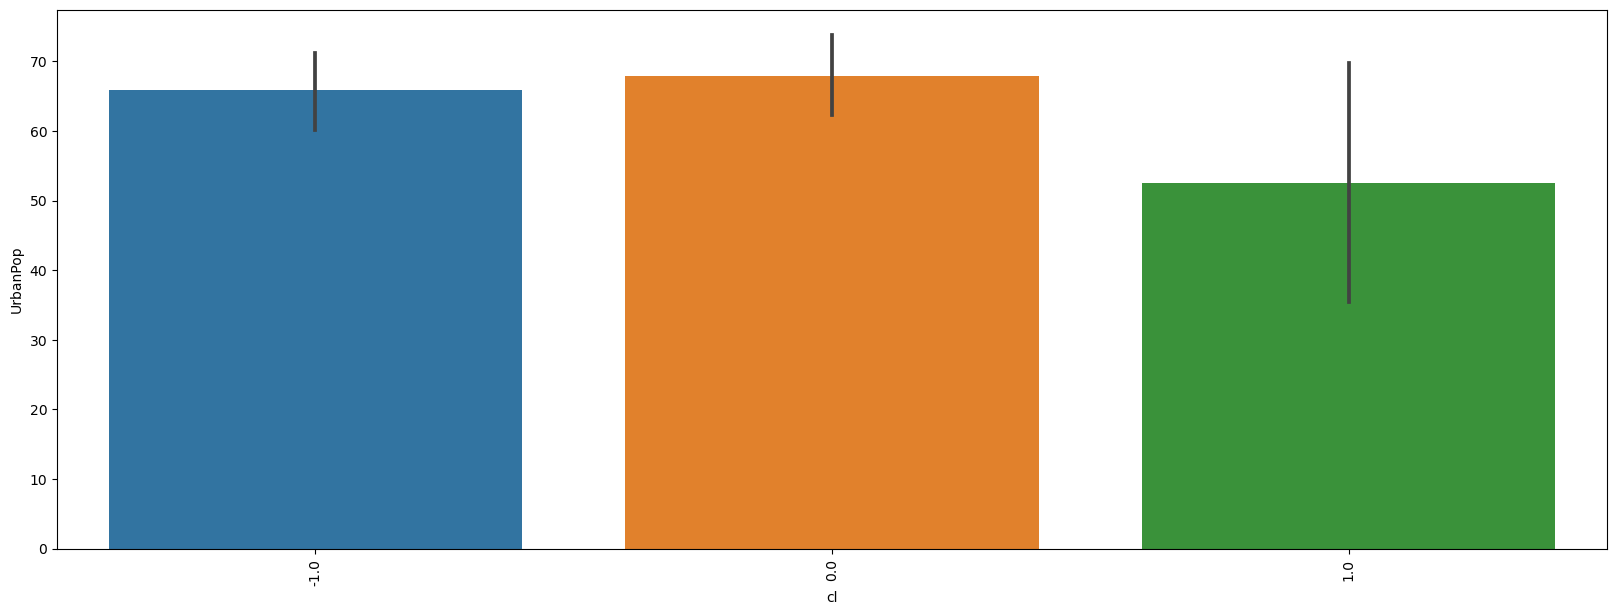

In [102]:
#plotting the rate of  clusters in urban population
plt.figure(figsize=(20,7))
UrbanPop = df5[['cl','UrbanPop']].sort_values('UrbanPop',ascending=False)
ax = sns.barplot(x = 'cl',y = 'UrbanPop',data = UrbanPop)
ax.set(xlabel = 'cl',ylabel = 'UrbanPop')
plt.xticks(rotation = 90)
plt.show()

In [103]:
#Kmeans for conclusion
df3.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,6.294118,141.882353,72.470588,19.235294,0.000000
1,1,12.833333,255.000000,68.833333,27.888889,1.333333
2,2,4.076923,78.538462,52.076923,12.692308,0.000000
